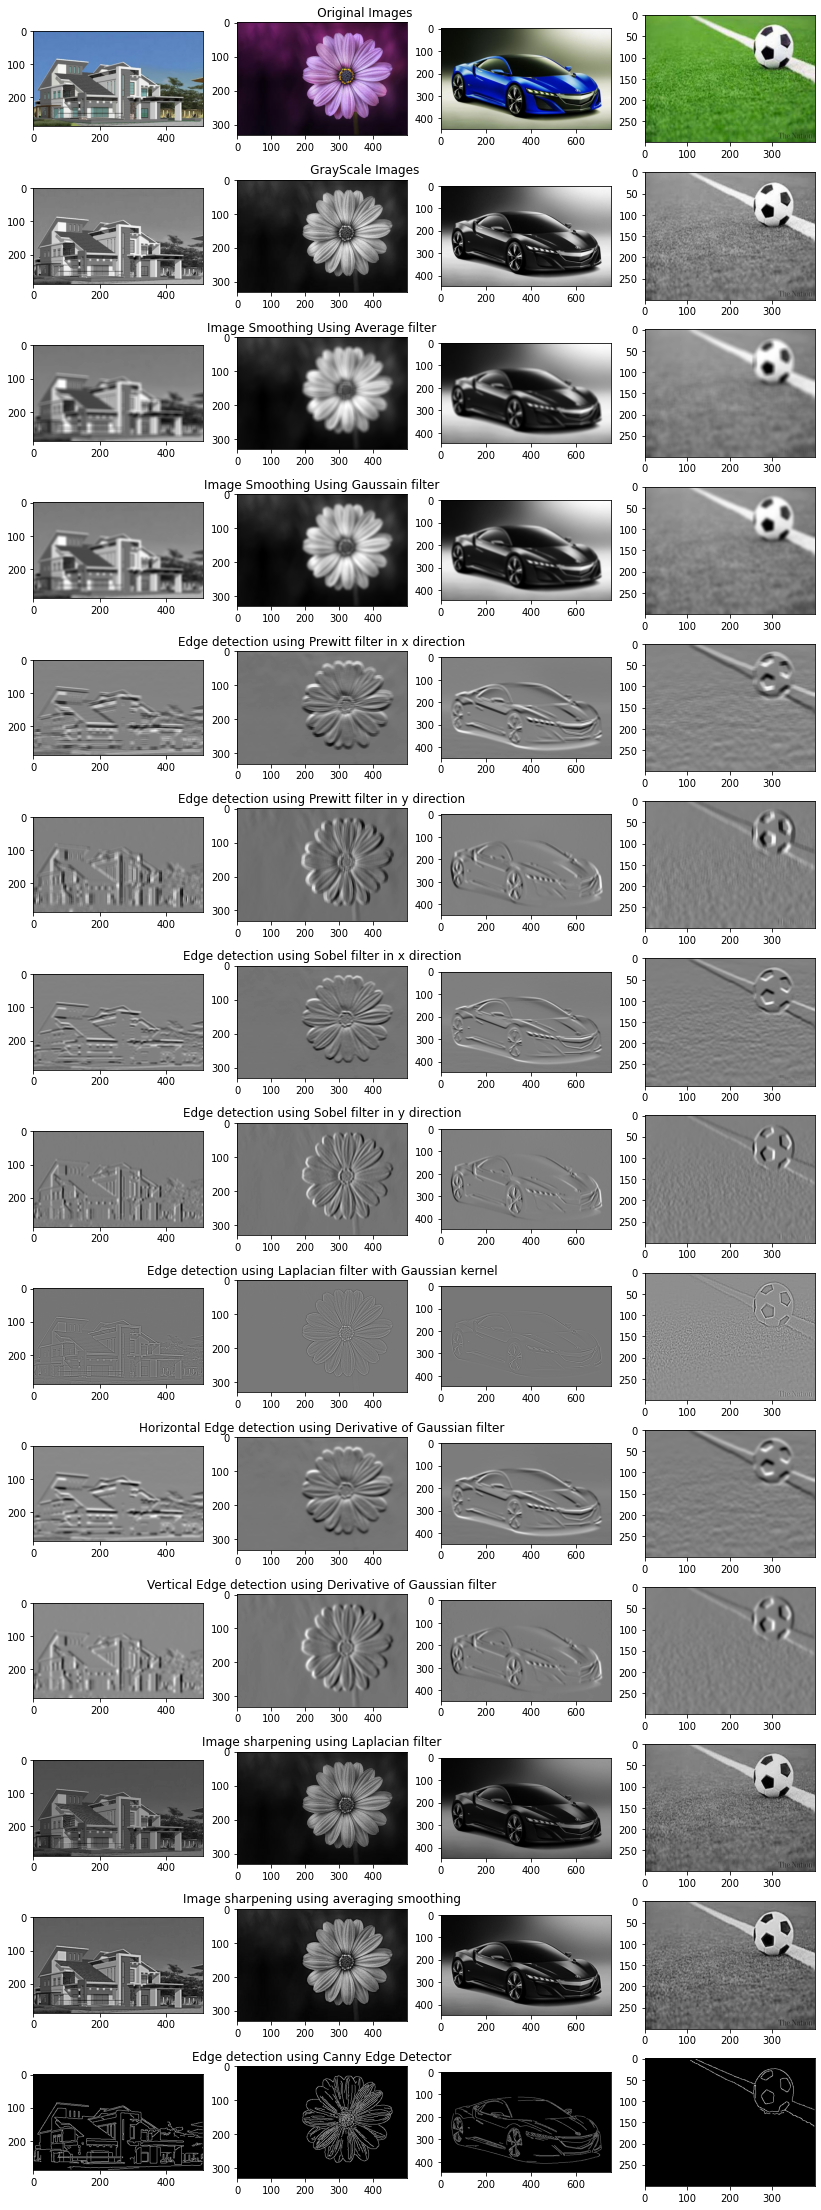

In [2]:
"""

@author: noman
"""

import numpy as np
from scipy import ndimage
from skimage.io import imread                        
from skimage import feature
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu
import glob
columns = 4
rows = 14
n=0;
fig, ax = plt.subplots(rows, columns, figsize=(14, 40))

images1=glob.glob(r"D:\*.jpg")
for image in images1:
############### Original Image ########################
    img = imread(image)
    ax[0,n].imshow(img)
    n=n+1
    ax[0,1].set_title("                      Original Images")                               
################ GrayScale Image ######################
    image_gray = rgb2gray(img)
    ax[1,n-1].imshow(image_gray,cmap=plt.cm.gray)
    ax[1,1].set_title("                      GrayScale Images")                              
################# Average Filter ######################
    size=11
    avg = np.ones((size,size))/(size**2)
    avg_filter=ndimage.convolve(image_gray, avg, mode='nearest', cval=0.0,)
    ax[2,n-1].imshow(avg_filter,cmap=plt.cm.gray)
    ax[2,1].set_title("Image Smoothing Using Average filter")                              
    
################# Gaussian Filter ######################
    a = np.zeros((11, 11))
    a[5, 5] = 1
    gau=ndimage.gaussian_filter(a, sigma=3)
#    gau.sum() = 1
    gau_filter=ndimage.convolve(image_gray, gau, mode='nearest', cval=0.0,)
    ax[3,n-1].imshow(gau_filter,cmap=plt.cm.gray)
    ax[3,1].set_title("Image Smoothing Using Gaussain filter")
    
######### Edge detection using Prewitt filters in x direction ##########
    ones =np.ones((1,11))
    zeros=np.zeros((9,11))
    nones=-1*np.ones((1,11))
    prewitt_x= (1/11)*np.concatenate([ones, zeros,nones])
#prewitt_x = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
    prex_filter=ndimage.convolve(image_gray, prewitt_x, mode='nearest', cval=0.0)
#    abs_value = np.absolute(prex_filter)
#    abs_prex_filter = abs_value/np.amax(abs_value)
    ax[4,n-1].imshow(prex_filter,cmap=plt.cm.gray)
    ax[4,1].set_title("Edge detection using Prewitt filter in x direction")

######### Edge detection using Prewitt filters in y direction ##########
    prewitt_y= prewitt_x.transpose()
#prewitt_x = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
    prex_filter=ndimage.convolve(image_gray, prewitt_y, mode='nearest', cval=0.0)
    
    ax[5,n-1].imshow(prex_filter,cmap=plt.cm.gray)
    ax[5,1].set_title("Edge detection using Prewitt filter in y direction")
    
######### Edge detection using Sobel filters in x direction ##########
    a=np.array([[1.],[0.],[0.],[2.],[0.],[0.],[1.]])
    a=a.transpose()
    b=np.zeros((5,7))
    c=-1*a
    sob_x= (1/4)*np.concatenate([a,b,c])
    sobx_filter=ndimage.convolve(image_gray, sob_x, mode='nearest', cval=0.0)
    ax[6,n-1].imshow(sobx_filter,cmap=plt.cm.gray)
    ax[6,1].set_title("Edge detection using Sobel filter in x direction")

######### Edge detection using Sobel filters in y direction ##########

    sob_y= sob_x.transpose()
    soby_filter=ndimage.convolve(image_gray, sob_y, mode='nearest', cval=0.0)
    ax[7,n-1].imshow(soby_filter,cmap=plt.cm.gray)
    ax[7,1].set_title("Edge detection using Sobel filter in y direction")
    
    
######## Edge detection using Laplacian filter with Gaussian kernel #########
    gaus=(1/16)*np.array([[1.0, 2.0, 1.0],[2.0, 4.0, 2.0],[1.0, 2.0, 1.0]])
    gaus_image=ndimage.convolve(image_gray, gaus, mode='nearest', cval=0.0)
    lap=(1/4)*np.array([[0.0, -1.0, 0.0],[-1.0, 4.0, -1.0],[0.0, -1.0, 0.0]])
    lap_gau_image=ndimage.convolve(gaus_image, lap, mode='nearest', cval=0.0)
    ax[8,n-1].imshow(lap_gau_image,cmap=plt.cm.gray)
    ax[8,1].set_title("Edge detection using Laplacian filter with Gaussian kernel")
    
######## Horizontal Edge detection using Derivative of Gaussian filter #########    
    x = np.zeros((18, 18))
    x[8:10, 8:10] = 1
    gau_n=(1/4)*ndimage.gaussian_filter(x, sigma=3)
#    gau_n.sum() = 1
    Gaun_image=ndimage.convolve(image_gray, gau_n, mode='nearest', cval=0.0)
#    dx=np.array([[0.0,0,0.0],[1.0,0,-1.0],[0.0,0,0.0],])
#    dx=np.array([[0.0,1.0,0.0],[0.0,0, 0.0],[0.0,-1.0,0.0],])
    dx=np.array([[1.0],[-1.0]])
    Dev_filter=ndimage.convolve(Gaun_image, dx, mode='nearest', cval=0.0)
    ax[9,n-1].imshow(Dev_filter,cmap=plt.cm.gray)
    ax[9,1].set_title("Horizontal Edge detection using Derivative of Gaussian filter")

######## Vertical Edge detection using Derivative of Gaussian filter #########
    dy=np.array([[1.0,-1.0]])
    Dev_filter=ndimage.convolve(Gaun_image, dy, mode='nearest', cval=0.0)
    ax[10,n-1].imshow(Dev_filter,cmap=plt.cm.gray)
    ax[10,1].set_title("Vertical Edge detection using Derivative of Gaussian filter")
    
######### Image sharpening using Laplacian filter ####################
    shap=(1/8)*np.array([[-1.0, -1.0, -1.0],[-1.0, 16.0, -1.0],[-1.0, -1.0, -1.0]])
    lap_filter=ndimage.convolve(image_gray, shap, mode='nearest', cval=0.0)
#    print(np.amax(lap_filter)) = 1.1538642156862742
#    print(np.amin(lap_filter)) = -0.16712436274509804
    abs_value = np.absolute(lap_filter)
    result1 = abs_value/np.amax(abs_value)
    ax[11,n-1].imshow(result1,cmap=plt.cm.gray)
    ax[11,1].set_title("Image sharpening using Laplacian filter")
#    shap=(1/4)*np.array([[0.0, -1.0, 0.0],[-1.0, 4.0, -1.0],[0.0, -1.0, 0.0]])
#    lap_filter=ndimage.convolve(image_gray, shap, mode='nearest', cval=0.0)
#    lap_filter=image_gray+lap_filter
 #   ax[11,n-1].imshow(lap_filter,cmap=plt.cm.gray)
  #  ax[11,1].set_title("Image sharpening using Laplacian filter")
    
###### Image sharpening using averaging smoothing filter ############
    size=11
    avg_ones = np.ones((size,size))/(size**2)
    delta = np.zeros((size,size))
    delta[5, 5] = 1
# lambda = 1/2 here    
    shap_LPF=delta + ((1/2)*(delta-avg_ones))
    lapLPF_filter=ndimage.convolve(image_gray, shap_LPF, mode='nearest', cval=0.0)
# np.amax(abs2_value)=  1.1918934597310007
# np.amin(abs2_value)=  1.725814292655912e-06
    abs2_value = np.absolute(lapLPF_filter)
    result2 = abs2_value/np.amax(abs2_value)
#    lapLPF_filter=lapLPF_filter+image_gray
    ax[12,n-1].imshow(result2,cmap=plt.cm.gray)
    ax[12,1].set_title("Image sharpening using averaging smoothing")
    
######### Edge detection using Canny Edge Detector ###############
#    canny = feature.canny(image=image_gray,sigma=1, low_threshold=5, high_threshold=50,)

    upper=threshold_otsu(image_gray)
    lower=0.5*upper
    canny = feature.canny(image=image_gray,sigma=1,low_threshold=lower,high_threshold=upper)
    ax[13,n-1].imshow(canny,cmap=plt.cm.gray)
    ax[13,1].set_title("Edge detection using Canny Edge Detector")